-----
<center>
<h1 style="font-size: 50px; font-family: serif;">Consommation de carburant</h1>
<h3>Rédigé par :</h3>
<h4>ZIAN Hafsa- Hayhay Yasmine -Alahyani Aya - Kaoutar ?</h4>
</center>

---

<center>
<img src="./cons.jpeg" width="500" height='200'>
</center>

## 1-Problème :

Dans ce projet, l'objectif est de développer un modèle permettant de prédire si une voiture a une consommation de carburant élevée ou faible en fonction de ses caractéristiques techniques.


## 2-Métadonnées : 

Le jeu de données utilisé, appelé Auto, contient plusieurs variables descriptives liées aux performances et aux spécifications des véhicules, notamment :

- **mpg** : `Efficacité énergétique mesurée en miles par gallon (mpg)` 
- **cylindres**: `Nombre de cylindres du moteur.`
- **déplacement** : `Volume du moteur (en pouces cubes).`
- **puissance** : `Puissance du moteur (en chevaux).`
- **poids** : `Poids du véhicule (en livres).`
- **accélération** : `Temps requis pour passer de 0 à 60 mph (en secondes).`
- **année** : `Année de fabrication.`
- **origine** : `Région d'origine du véhicule.`
- **nom** : `Nom du modèle de voiture.`


<h2>
------------------- Table des matières ------------------
</h2>

A revenir 

## 3-Pretraitement : 


### 3-1.Importation des bibliothèques :

In [92]:
import pandas as pd #manipuler et analyser des données tabulaires
import seaborn as sns #facilite la création de visualisations statistiques attrayantes et informatives.
import numpy as np # manipuler des tableaux et effectuer des calculs mathématiques sur des ensembles de données numériques.
import matplotlib.pyplot as plt #créer des visualisations graphiques.
import warnings #gérer les avertissements.
warnings.filterwarnings('ignore') #Désactive les messages d'avertissement. 


### 3-2.Chargement des données :

In [93]:
donnees=pd.read_csv("pr3_data.csv",sep=",")

In [94]:
donnees.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [95]:
#Examiner les dernières lignes de DataFrame
donnees.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [96]:
#Un aperçu rapide de la taille de données
donnees.shape

(398, 9)

In [97]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 3-3.Vérification des Valeurs Manquantes :

In [98]:
#détecter et gérer les valeurs manquantes avant de poursuivre l'analyse ou la modélisation.
donnees.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [99]:
donnees.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: >

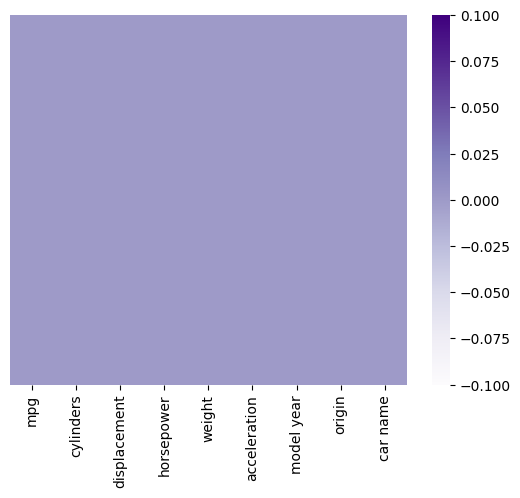

In [100]:
sns.heatmap(donnees.isnull(),yticklabels=False,cmap="Purples")

---> Parfait, La heatmap montre qu'il n'y a pas de valeurs manquantes dans le jeu de données, toutes les cellules sont complètes.

In [101]:
#Les colonnes 
donnees.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [102]:
#Les valeurs doublantes
donnees.duplicated().sum()

np.int64(0)

Les colonnes catégorielles dans un jeu de données sont celles qui contiennent des valeurs discrètes et souvent non numériques :
'cylinders'
'model year'
'origin'
'car name'

In [103]:
#Les colonnes catégorielles
donnees['origin'].value_counts()


origin
1    249
3     79
2     70
Name: count, dtype: int64

In [104]:
donnees['model year'].value_counts()

model year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [105]:
donnees['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [106]:
donnees["car name"].nunique()

305

In [107]:
donnees["car name"].value_counts().head(20)

car name
ford pinto                   6
ford maverick                5
amc matador                  5
toyota corolla               5
amc hornet                   4
peugeot 504                  4
toyota corona                4
amc gremlin                  4
chevrolet chevette           4
chevrolet impala             4
dodge colt                   3
ford gran torino             3
pontiac catalina             3
volkswagen dasher            3
plymouth duster              3
chevrolet caprice classic    3
honda civic                  3
plymouth fury iii            3
chevrolet nova               3
chevrolet vega               3
Name: count, dtype: int64

 La colonne "car name" peut ne pas être utile en tant que telle pour les modèles de prédiction, surtout si les noms des voitures sont très variés et uniques. Cependant, cette colonne peut contenir des informations importantes que vous pouvez exploiter, comme la marque de la voiture.

 Donc, Nous pouvons  extraire cette information en séparant le texte basé sur l'espace et en prenant le premier mot comme étant la marque de la voiture.Par exemple, "Toyota Corolla", "Ford Mustang", etc.).
 

In [108]:
donnees['car_brand'] = donnees['car name'].apply(lambda x: x.split()[0])



In [109]:
donnees['car_brand'].value_counts()[:20]

car_brand
ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
oldsmobile    10
mazda         10
peugeot        8
fiat           8
audi           7
vw             6
volvo          6
chrysler       6
Name: count, dtype: int64

 ### 3-4.Standardisation des Marques :

==>Standardiser les noms de marques :
Il existe quelques noms de marques qui sont répétés mais avec des facons différentes par exemple : volkswagen est répété comme vokswagen, vw etc.
Alors, On doit standariser les noms 

In [110]:
brand_mapping = {
    'volkswagen': 'VW',
    'vokswagen': 'VW',
    'vw': 'VW',
    'chevrolet': 'chevrolet',
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'maxda': 'mazda',
    'toyouta': 'toyota',
    'mercedes': 'mercedes-benz',
    'nissan': 'datsun',
    'capri': 'ford'
}
donnees['car_brand'] = donnees['car_brand'].replace(brand_mapping)
donnees[donnees['car_brand'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand


-->Aucun valeur nulle

### 3-5.Création de la Variable Binaire mpg01 :

In [111]:
median_mpg = donnees['mpg'].median()

donnees['mpg01'] = donnees['mpg'].apply(lambda x: 1 if x > median_mpg else 0)

donnees[['mpg', 'mpg01']].head(20)

,mpg,mpg01
0,18.0,0
1,15.0,0
2,18.0,0
3,16.0,0
4,17.0,0
5,15.0,0
6,14.0,0
7,14.0,0
8,14.0,0
9,15.0,0


-->La majorité des voitures ont une valeur mpg inférieure à la médiane (représentée par 0 dans la colonne mpg01).

In [112]:
def consommation(x):
    if x == 0:
        return "Faible"
    elif x == 1:
        return "Élevée"

In [113]:
donnees['consommation'] = donnees['mpg01'].apply(consommation)


In [114]:
donnees.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand,mpg01,consommation
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,0,Faible
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,0,Faible
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,0,Faible
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0,Faible
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,0,Faible
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,ford,0,Faible
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,chevrolet,0,Faible
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,plymouth,0,Faible
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,pontiac,0,Faible
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,amc,0,Faible


### 3-6.La visualisation graphique :


In [125]:
#donnees[['mpg', 'mpg01']].head(10)
#donnees.isna().sum()

donnees['mpg01'].value_counts()


mpg01
0    207
1    191
Name: count, dtype: int64

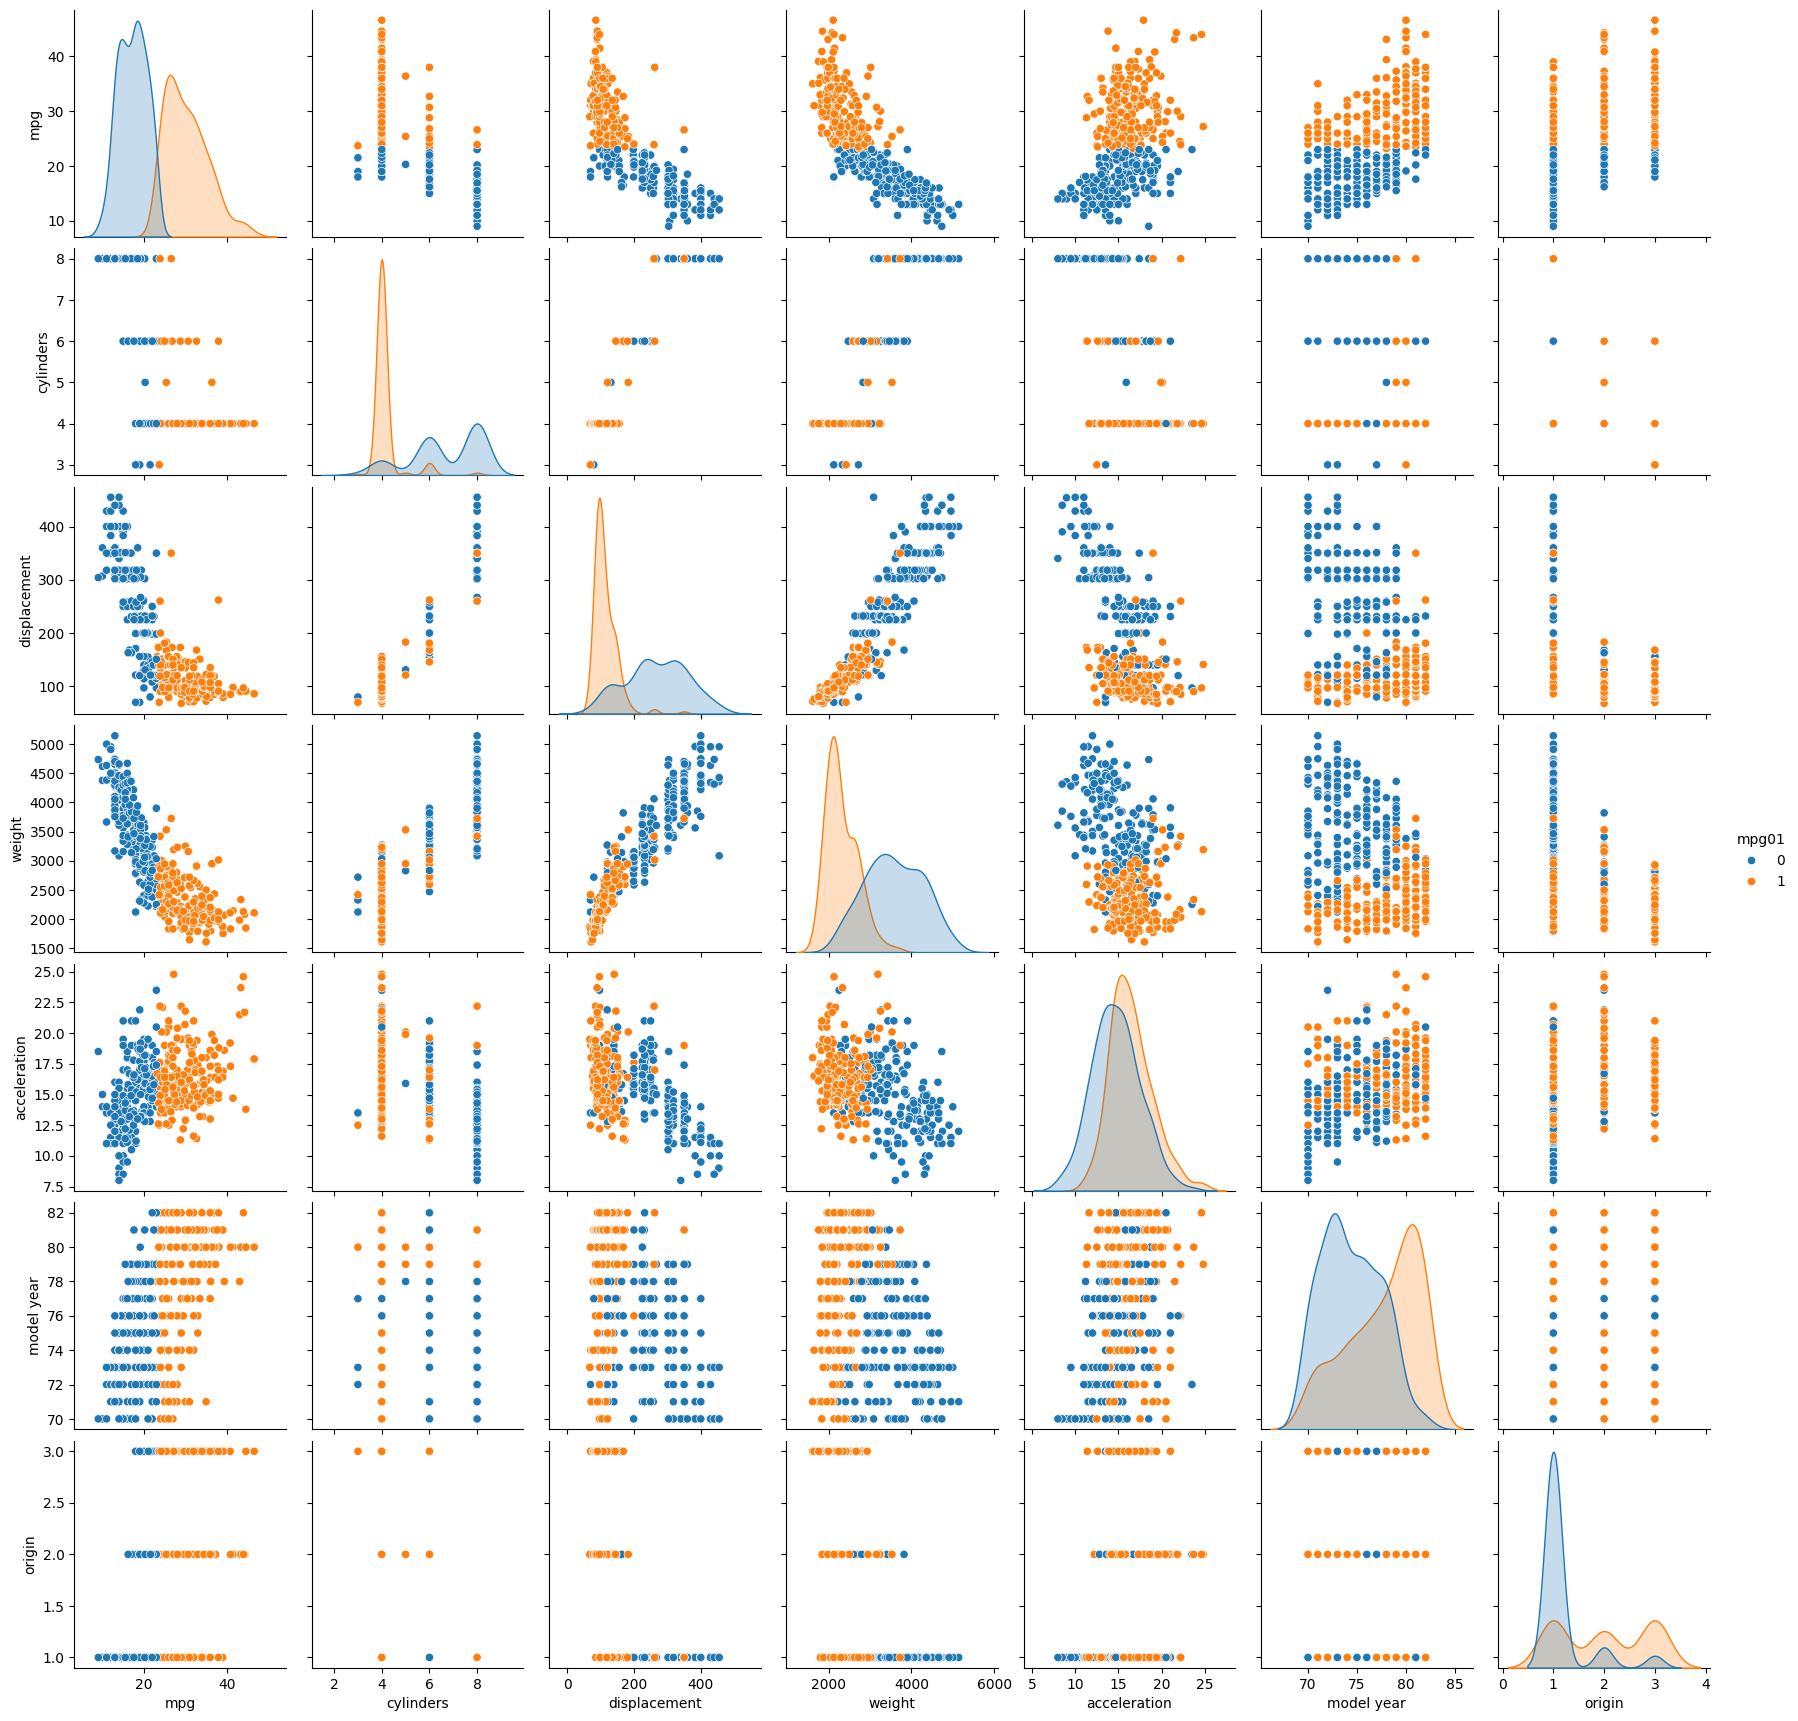

In [128]:
sns.pairplot(donnees,hue="mpg01")

Le problème que nous rencontrons, où la variable horsepower n'apparaît pas dans notre pairplot,
Il semble que la colonne horsepower soit actuellement au format object c'est-à-dire sous forme de chaînes de caractères, alors qu'elle devrait être numérique pour pouvoir être utilisée dans un graphique comme un pairplot.

In [134]:
#donnees['horsepower'].head(10)
donnees['horsepower'] = pd.to_numeric(donnees['horsepower'], errors='coerce')
donnees['horsepower'] = donnees['horsepower'].fillna(donnees['horsepower'].median())
donnees['horsepower'].isna().sum() 



np.int64(0)

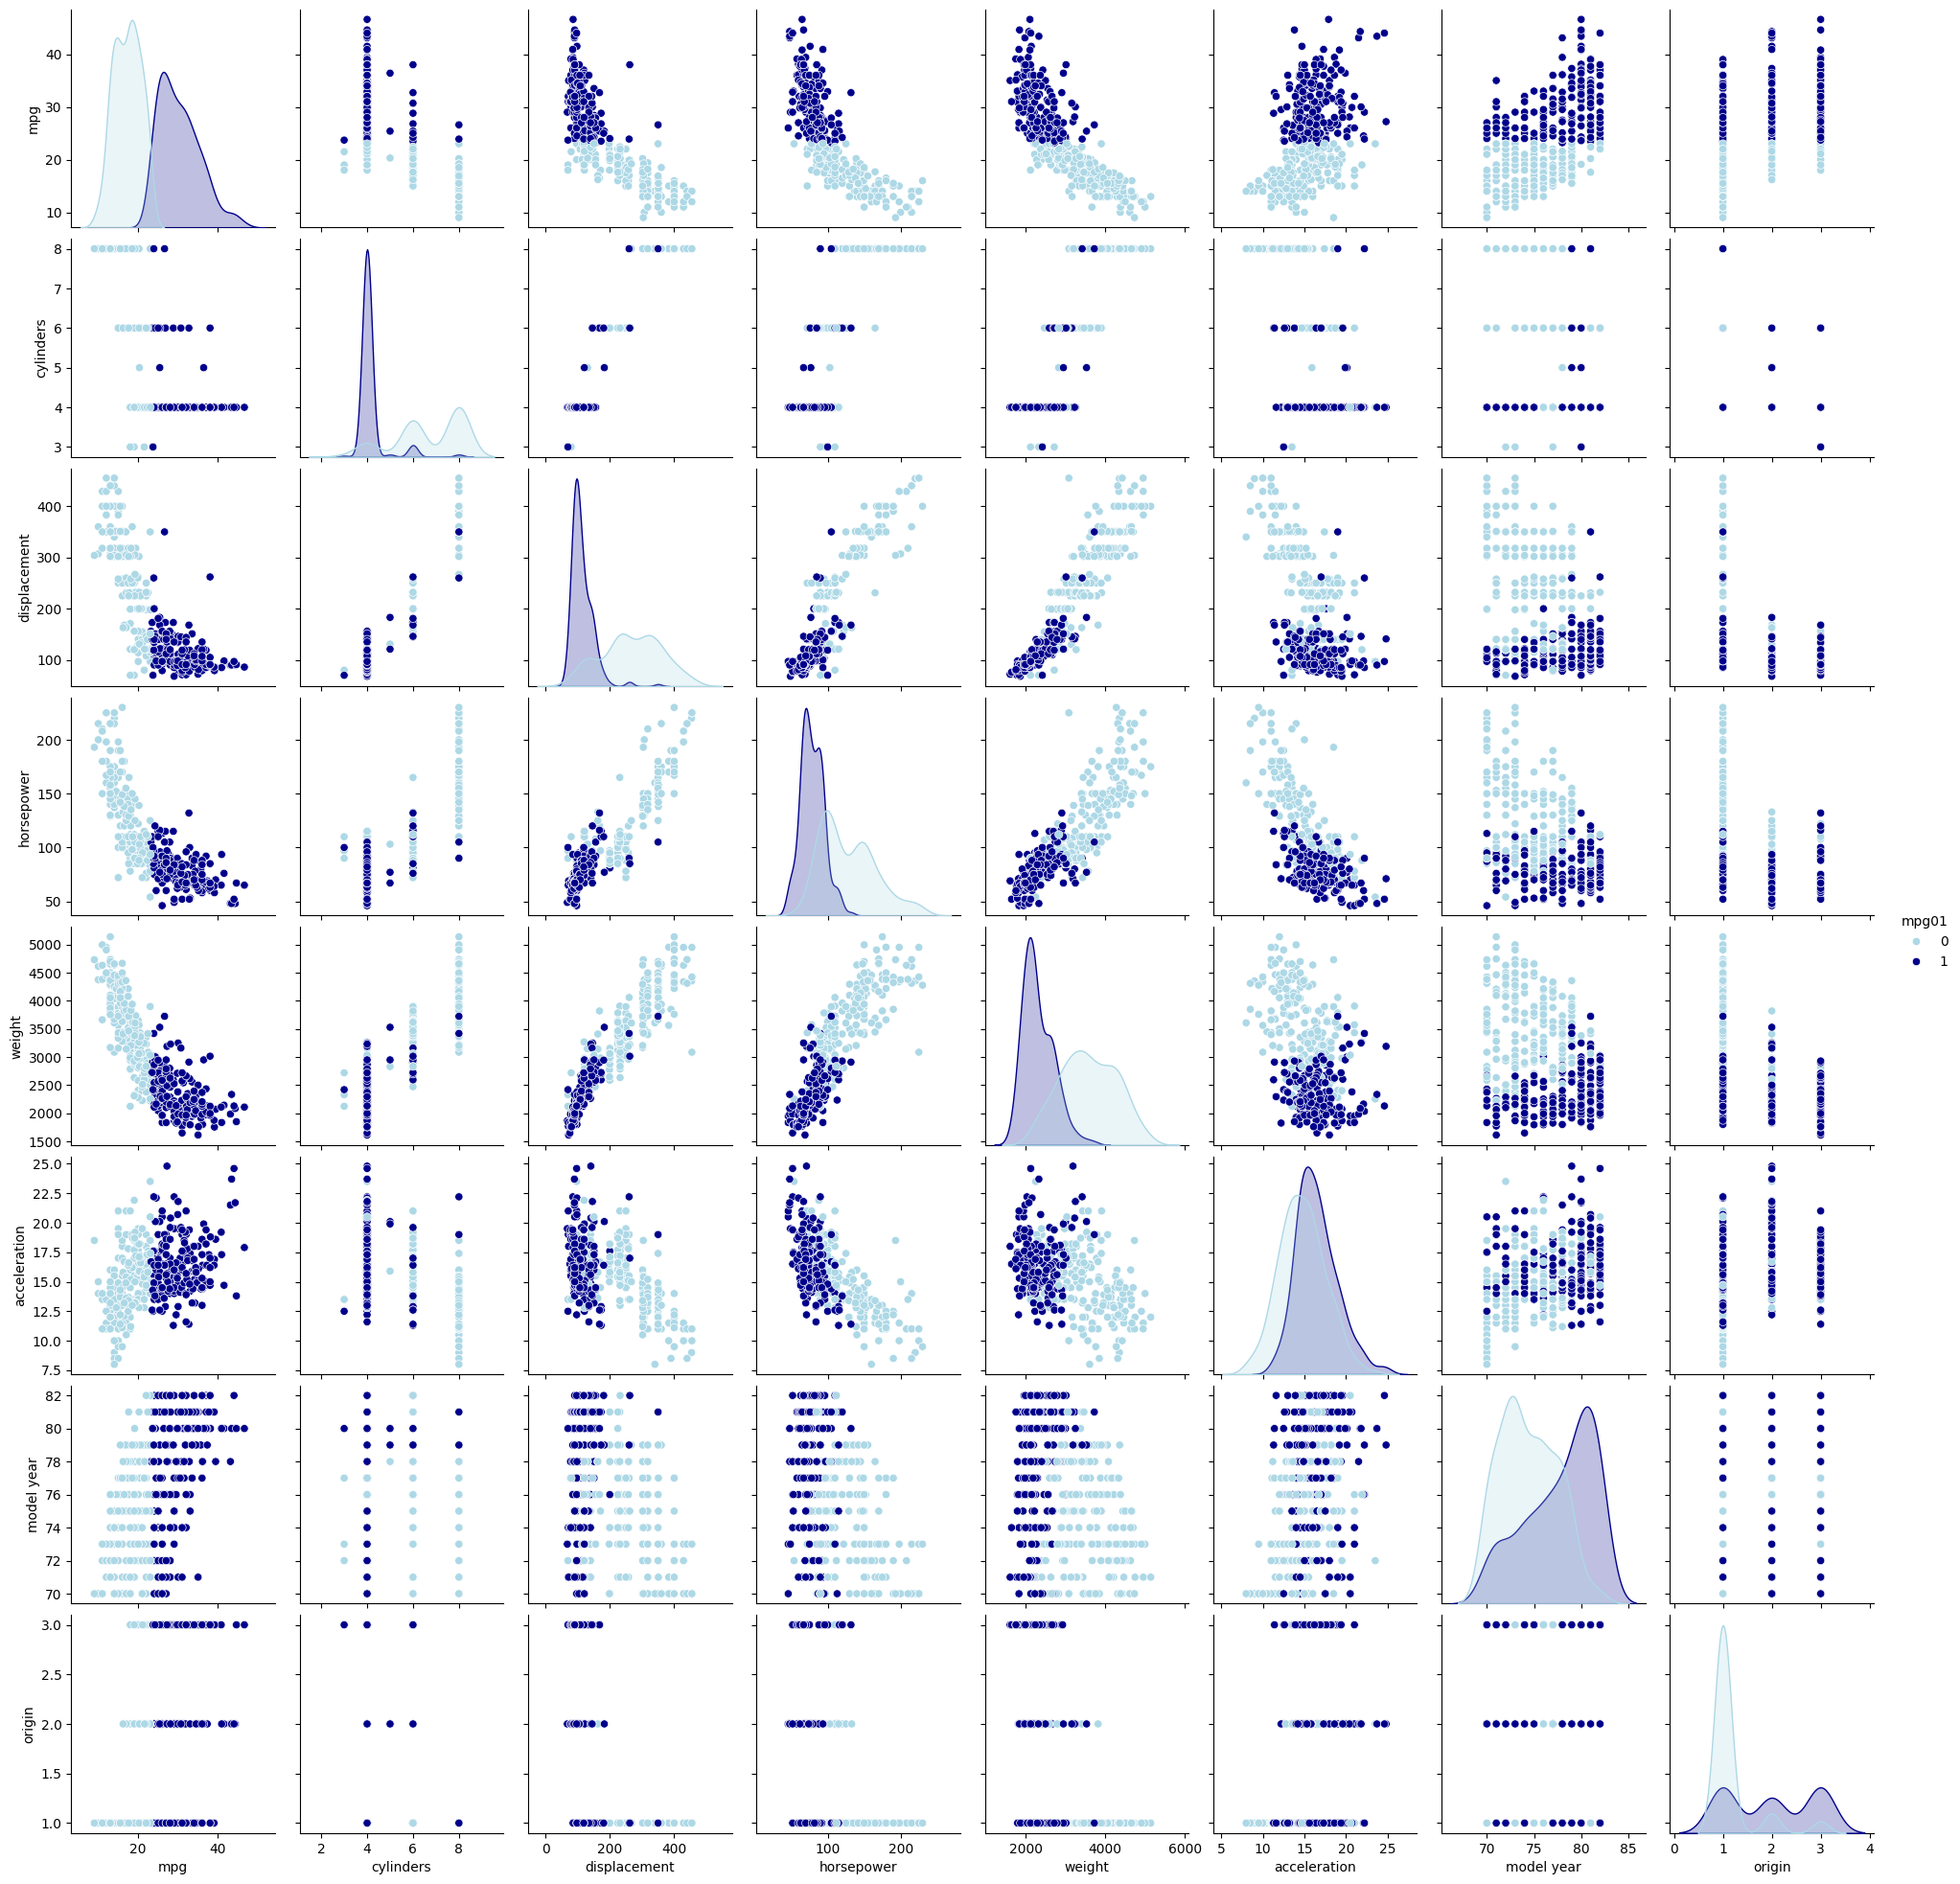

In [137]:
sns.pairplot(donnees,hue="mpg01",palette=["lightblue","darkblue"])

### 3-7.Analyse des Marques par Consommation

nous analysons la répartition des marques automobiles en fonction des deux types de consommation (mpg01). Cette analyse permet de comprendre si un type de consommation sont associées à un plus grand nombre de marques.

In [149]:


plt.figure(figsize=(20,8))
brands_faible=donnees[donnees["mpg01"]==0]["car_brand"]
brands_elevee=donnees[donnees["mpg01"]==1]["car_brand"]
brand_consommation=pd.DataFrame([["Faible",brands_faible.nunique()],["Elevee",brands_elevee.nunique()]],
                          columns=["Type_Consommation","Nombre de marques"])
brand_consommation

,Type_Consommation,Nombre de marques
0,Faible,22
1,Elevee,26


<Figure size 2000x800 with 0 Axes>

<Axes: >

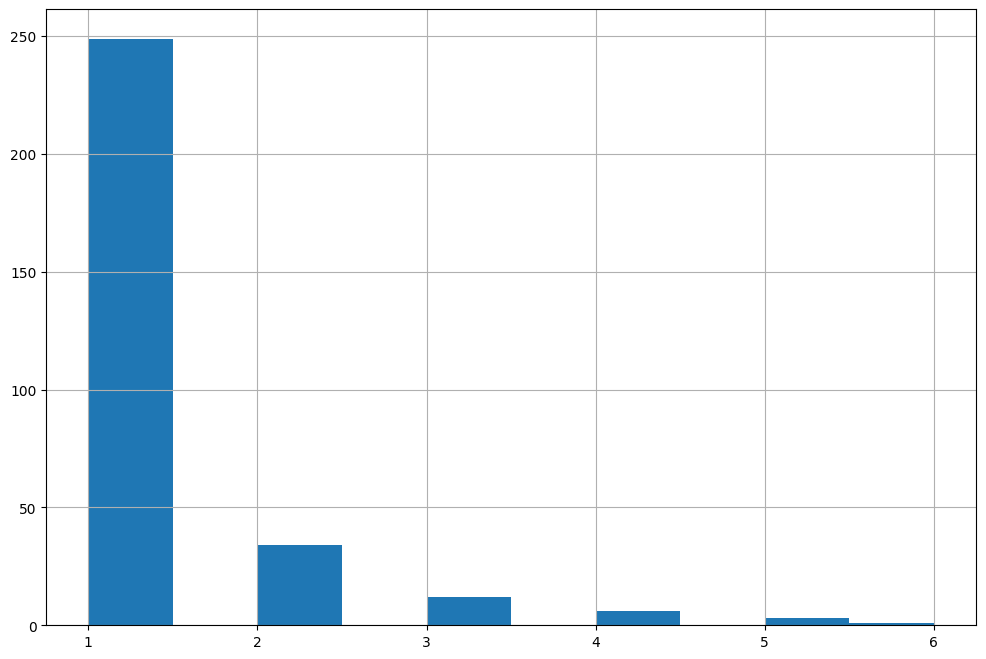

In [150]:
plt.figure(figsize=(12,8))
donnees["car name"].value_counts().hist()

In [151]:
donnees["car name"].nunique()

305

Puisque la plupart des noms de voitures sont uniques. Il n'y a donc aucune information utile dans cette colonne. Nous pouvons le Supprimer.

In [152]:
donnees.drop("car name",axis=1,inplace=True)

### 3-8.Analyse de Corrélation entre les données  :

In [155]:
donnees.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car_brand        object
mpg01             int64
consommation     object
dtype: object

In [157]:
numerique_donnees = donnees.select_dtypes(include=['number'])

Les colonnes "car brand" (texte) et "consommation" doivent être exclues pour la corrélation, car elles ne peuvent pas être converties directement en float.
Seules les colonnes comme mpg, cylinders, displacement, etc., seront prises en compte dans la matrice de corrélation.

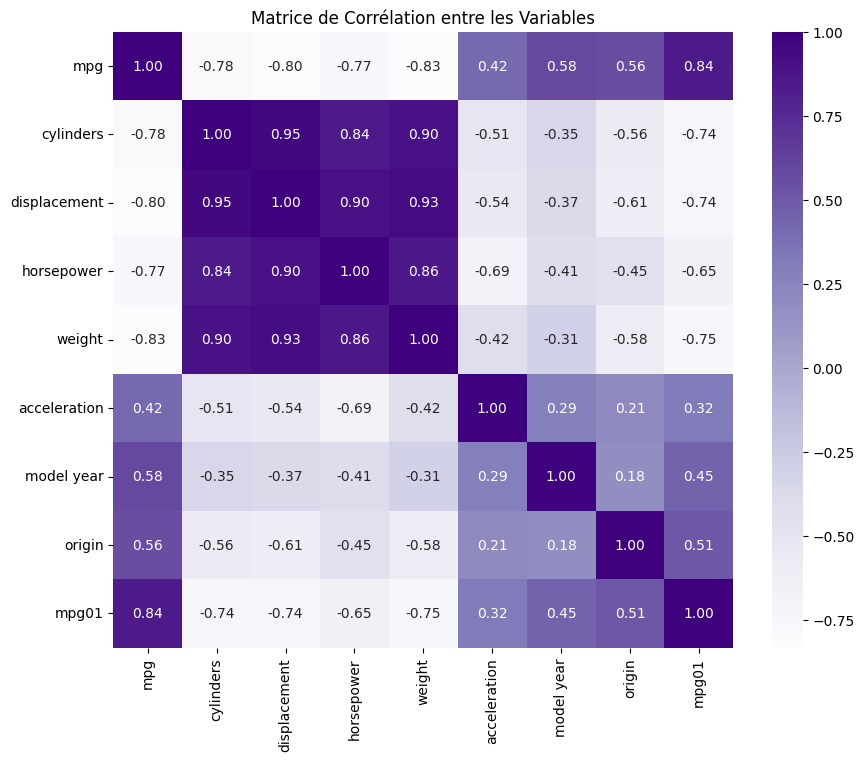

In [162]:
#numerique_donnees.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numerique_donnees.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.title("Matrice de Corrélation entre les Variables")
plt.show()

**Corrélation forte :** 

mpg a une forte corrélation positive avec mpg01 (+0.84).
weight a une forte corrélation négative avec mpg (-0.83).

**Corrélations intéressantes pour mpg01 :**

Positivement corrélé avec mpg (+0.837), ce qui est logique puisque mpg01 est basé sur mpg.
Négativement corrélé avec des caractéristiques telles que weight (-0.75), cylinders (-0.74), et displacement (-0.74).

**Faibles corrélations :**

Certaines variables comme acceleration et origin ont des corrélations plus faibles avec mpg ou mpg01.



----->La matrice de corrélation met en évidence les relations entre les différentes caractéristiques. On observe que la consommation de carburant (mpg) est fortement corrélée négativement avec le poids (weight), le nombre de cylindres (cylinders), et la cylindrée (displacement). À l'inverse, mpg montre une corrélation positive notable avec l'accélération (acceleration) et l'année du modèle (model year). Ces tendances confirment que les voitures plus modernes et légères consomment généralement moins de carburant.

## 4-Visualisation des Distributions : 


### 4.1 Graphiques pour les caractéristiques catégorielles

#### a. Nombre de voitures appartenant à chaque origine

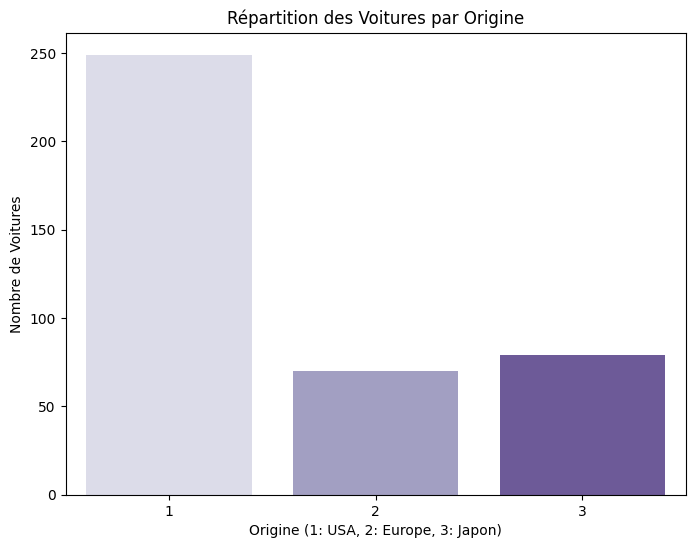

In [167]:
plt.figure(figsize=(8, 6))
sns.countplot(data=donnees, x='origin', palette='Purples')
plt.title("Répartition des Voitures par Origine")
plt.xlabel("Origine (1: USA, 2: Europe, 3: Japon)")
plt.ylabel("Nombre de Voitures")
plt.show()

--->Les USA ont le plus grand nombre de voitures dans le dataset, ce qui pourrait indiquer une forte dominance des modèles américains.<br>
---->Le Japon et l'Europe ont un nombre presque équivalent de voitures, représentant une part plus équilibrée par rapport aux USA.

#### b. Nombre de voitures appartenant au nombre total de cylindres présents

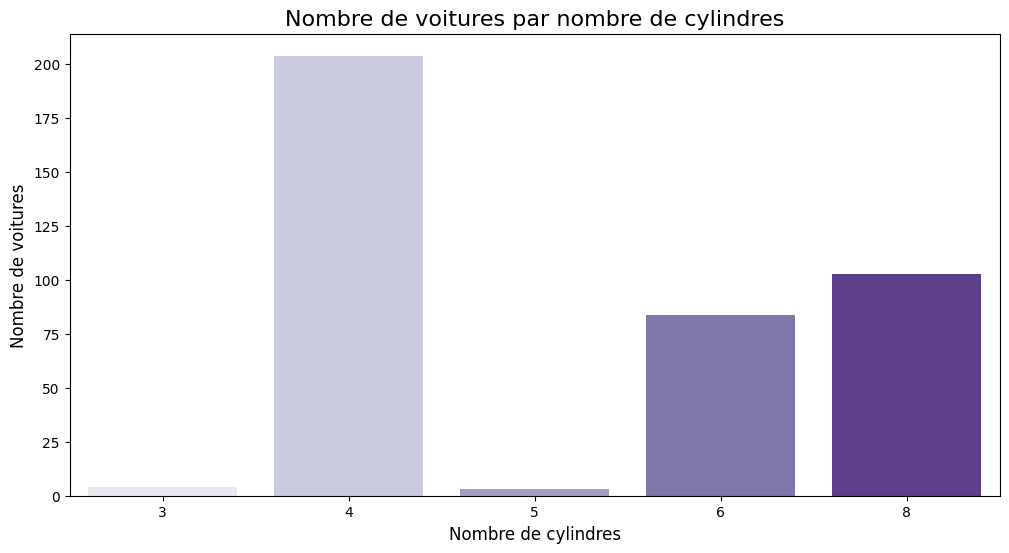

In [170]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cylinders', data=donnees, palette='Purples')
plt.title('Nombre de voitures par nombre de cylindres', fontsize=16)
plt.xlabel('Nombre de cylindres', fontsize=12)
plt.ylabel('Nombre de voitures', fontsize=12)
plt.show()


Les voitures à 4 cylindres sont les plus courantes dans l'ensemble des données.
Les voitures avec 6 ou 8 cylindres représentent un pourcentage significatif.
Les autres catégories de cylindres ( 3, 5) sont moins présentes, mais montrent des voitures plus rares.

#### c. Nombre de voitures appartenant au nombre total de cylindres présents dans chaque origine 

In [175]:
def country(x):
    if x==1:
        return "USA"
    elif x==2:
        return "Europe"
    elif x==3:
        return "Japan"
    


In [177]:
donnees["origin"]=donnees["origin"].apply(country)

In [178]:
donnees.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_brand,mpg01,consommation
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet,0,Faible
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick,0,Faible
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth,0,Faible
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc,0,Faible
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford,0,Faible


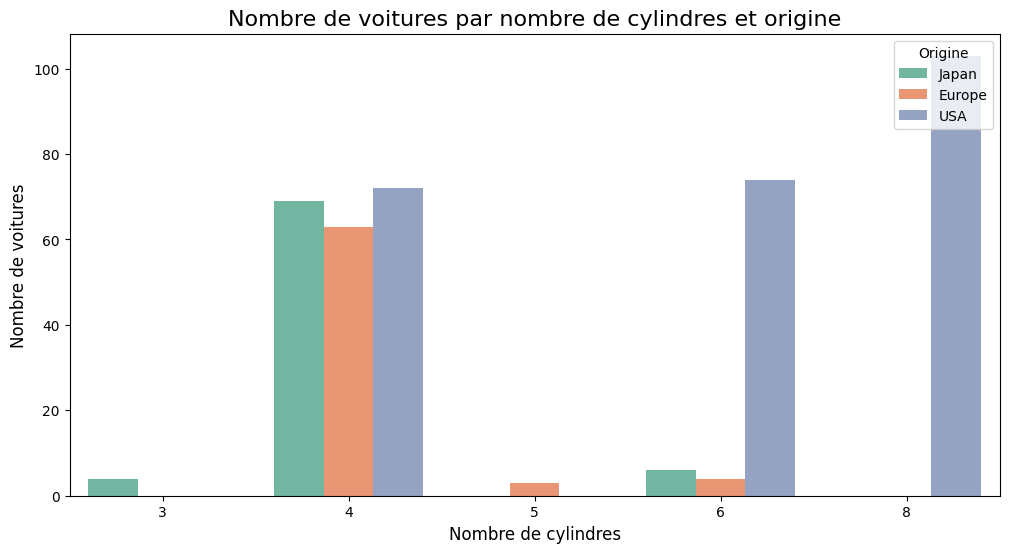

In [179]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cylinders', data=donnees, hue='origin', palette='Set2')
plt.title('Nombre de voitures par nombre de cylindres et origine', fontsize=16)
plt.xlabel('Nombre de cylindres', fontsize=12)
plt.ylabel('Nombre de voitures', fontsize=12)
plt.legend(title='Origine', loc='upper right')
plt.show()


**USA :** Le nombre de voitures avec 8 cylindres est le plus élevé.<br>
**Europe :** Une majorité de voitures a 4 cylindres.<br>
**Japon :** La majorité des voitures japonaises ont également 4 cylindres.

#### d. Nombre de voitures appartenant à chaque année modèle

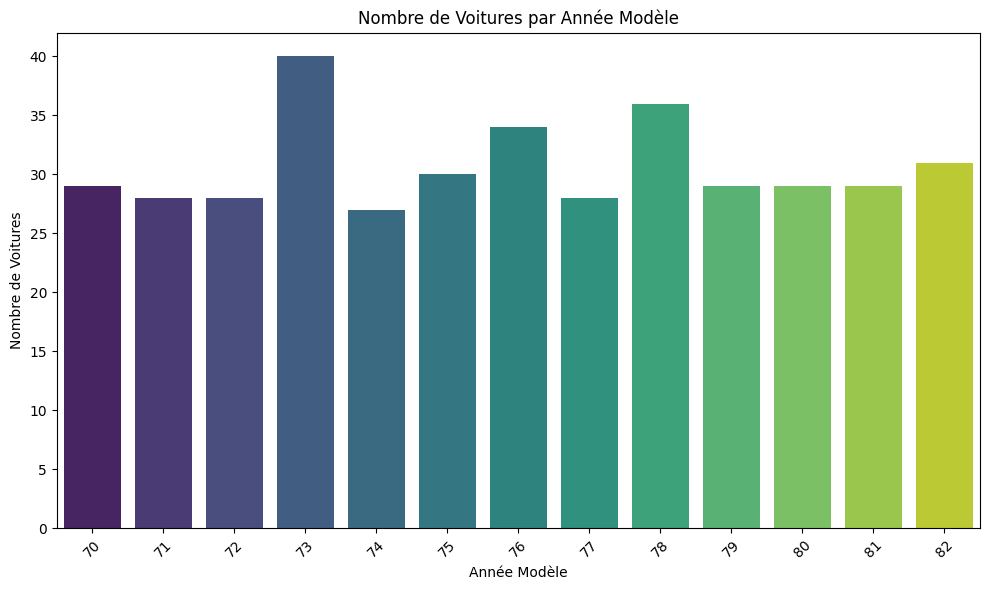

In [180]:

plt.figure(figsize=(10, 6))
sns.countplot(x='model year', data=donnees, palette='viridis')
plt.title('Nombre de Voitures par Année Modèle')
plt.xlabel('Année Modèle')
plt.ylabel('Nombre de Voitures')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Les voitures de l'année-modèle 73 ont le plus grand nombre de voitures.<br>
Les autres années-modèles sont réparties presque de la même manière.